In [1]:
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "..")   


In [2]:
%reload_ext autoreload
%autoreload 2

In [4]:
path=Path("../output/metrics/20251120_2013_2014_store_2000_item_cyc_features_metrics.xlsx")
df = pd.read_excel(path)
df.head()

,Model,Store,Item,RMSSE,MASE,SMAPE,MARRE,RMSE,MAE,OPE
0,EXPONENTIAL_SMOOTHING,25,1003679,0.482754,0.502895,186.264151,11.434536,0.747808,0.428795,106.515636
1,AUTO_ARIMA,25,1003679,0.460660,0.425164,196.475750,9.667147,0.713584,0.362518,103.867128
2,THETA,25,1003679,0.457320,0.424786,197.835978,9.658537,0.708411,0.362195,85.520397
3,KALMAN,25,1003679,0.459997,0.409380,199.927830,9.308250,0.712556,0.349059,99.333999
4,EXPONENTIAL_SMOOTHING,25,1004550,0.641093,0.484211,114.837232,5.212264,1.660292,0.779415,3.061403


In [7]:
df.query("Model == 'KALMAN' & RMSSE > 100")

,Model,Store,Item,RMSSE,MASE,SMAPE,MARRE,RMSE,MAE,OPE
63047,KALMAN,38,268662,4.014854e+04,5.733501e+04,199.139483,1.145330e+06,2.157362e+05,9.035385e+04,2.288701e+07
68243,KALMAN,3,105575,1.033863e+03,2.247737e+03,198.228788,3.169259e+04,5.199451e+03,2.590960e+03,1.212206e+06
79159,KALMAN,44,153267,5.761025e+02,1.041760e+03,195.922610,3.403064e+04,1.986473e+03,1.041022e+03,6.244543e+05
93459,KALMAN,48,105575,1.316188e+10,1.224431e+10,198.846839,2.512371e+11,4.194874e+10,1.182630e+10,4.617871e+12
109567,KALMAN,51,856687,2.907865e+02,1.916386e+02,200.000000,1.514367e+00,7.216173e+01,9.275034e+00,1.000000e+02
144299,KALMAN,46,557241,2.338705e+02,8.092204e+01,199.981863,1.339971e+00,1.246358e+02,1.466764e+01,1.000006e+02
145891,KALMAN,9,819932,4.667680e+04,6.894863e+04,198.558995,6.631137e+05,2.850445e+05,1.177690e+05,1.446134e+07
163855,KALMAN,11,411557,1.238142e+05,1.631032e+05,197.495162,1.366957e+05,5.350269e+05,2.132278e+05,7.079379e+06
163919,KALMAN,49,208530,1.712492e+02,1.074054e+02,199.999570,1.623607e+00,3.119755e+01,4.278826e+00,9.998103e+01
166219,KALMAN,26,361502,6.140107e+02,2.130248e+03,199.104537,4.959704e+04,9.487072e+03,4.910107e+03,1.469663e+06


In [5]:
metrics_stats = df.groupby('Model')[['SMAPE', 'RMSSE', 'MASE']].agg(['mean', 'std']).reset_index()
metrics_stats

Model       SMAPE                     RMSSE                \
                                mean        std           mean           std   
0             AUTO_ARIMA  166.490706  19.514891       0.781149  2.292016e+00   
1  EXPONENTIAL_SMOOTHING  161.390780  24.548920       0.821142  3.913351e+00   
2                 KALMAN  190.896428  11.943659  218244.755728  5.359488e+07   
3                  THETA  166.539162  21.216594       0.799261  2.290455e+00   

            MASE                
            mean           std  
0       0.758826  1.360235e+00  
1       1.030057  3.116998e+01  
2  203032.627870  4.985854e+07  
3       0.791237  1.370036e+00

In [11]:
%pwd

'/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook'

In [ ]:
df = pd.read_csv("../data/train.csv", low_memory=True, nrows=1000)
df.rename(columns={"store_nbr": "store", "item_nbr": "item"}, inplace=True)
df.drop(["id","onpromotion"], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df[(df['date'] >= '2013-01-01') & (df['date'] <= '2014-12-31')]
df.head()

,date,store,item,unit_sales
0,2013-01-01,25,103665,7.0
1,2013-01-01,25,105574,1.0
2,2013-01-01,25,105575,2.0
3,2013-01-01,25,108079,1.0
4,2013-01-01,25,108701,1.0


In [38]:
df.describe()

,date,store,item,unit_sales
count,1000,1000.000000,1.000000e+03,1000.000000
mean,2013-01-01 10:07:40.799999744,14.872000,4.885603e+05,5.865511
min,2013-01-01 00:00:00,1.000000,1.036650e+05,0.502000
25%,2013-01-01 00:00:00,1.000000,2.623580e+05,1.000000
50%,2013-01-01 00:00:00,25.000000,4.141460e+05,3.000000
75%,2013-01-02 00:00:00,25.000000,7.231905e+05,7.000000
max,2013-01-02 00:00:00,25.000000,1.109389e+06,90.000000
std,NaN,11.859016,2.904307e+05,8.309150


In [39]:
tr_df = pd.read_csv("../data/transactions.csv")
tr_df.rename(columns={"store_nbr": "store"}, inplace=True)
tr_df['date'] = pd.to_datetime(tr_df['date'])
tr_df.head()

,date,store,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [18]:
df.merge(tr_df, on=["store_nbr", "date"], how="left")

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions
0,0,2013-01-01,25,103665,7.0,NaN,770
1,1,2013-01-01,25,105574,1.0,NaN,770
2,2,2013-01-01,25,105575,2.0,NaN,770
3,3,2013-01-01,25,108079,1.0,NaN,770
4,4,2013-01-01,25,108701,1.0,NaN,770
...,...,...,...,...,...,...,...
995,995,2013-01-02,1,514172,10.0,NaN,2111
996,996,2013-01-02,1,514242,6.0,NaN,2111
997,997,2013-01-02,1,514327,12.0,NaN,2111
998,998,2013-01-02,1,514446,1.0,NaN,2111


In [30]:
store_df = pd.read_csv("../data/stores.csv")
store_df.rename(columns={"store_nbr": "store"}, inplace=True)
store_df.drop(["city", "state"], axis=1, inplace=True)
store_df.head()


,store,type,cluster
0,1,D,13
1,2,D,13
2,3,D,8
3,4,D,9
4,5,D,4


In [31]:
type_encoded = pd.get_dummies(store_df['type'], prefix='type', drop_first=True).astype(int)
store_df = pd.concat([store_df.drop('type', axis=1), type_encoded], axis=1)


In [32]:
store_df.head()

,store,cluster,type_B,type_C,type_D,type_E
0,1,13,0,0,1,0
1,2,13,0,0,1,0
2,3,8,0,0,1,0
3,4,9,0,0,1,0
4,5,4,0,0,1,0


In [24]:
store_df.dtypes

store_nbr     int64
city         object
state        object
cluster       int64
type_B         bool
type_C         bool
type_D         bool
type_E         bool
dtype: object

In [2]:
df = pd.read_csv("../data/items.csv")
df.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [6]:
len(df["class"].unique())

337

In [1]:
path = "../output/data/2013_2014_store_2000_item.parquet"
df = pd.read_parquet(path)
df.head()

,date,store_item,store,item,unit_sales,onpromotion,transactions,cluster,type_B,type_C,type_D,type_E,family,class,perishable,growth_rate
0,2013-01-01,25_1003679,25,1003679,3.0,None,770.0,1,0,0,1,0,GROCERY I,1028,0,0.0
1,2013-01-01,25_1004550,25,1004550,32.0,None,770.0,1,0,0,1,0,"LIQUOR,WINE,BEER",1318,0,0.0
2,2013-01-01,25_1004551,25,1004551,9.0,None,770.0,1,0,0,1,0,"LIQUOR,WINE,BEER",1318,0,0.0
3,2013-01-01,25_1009998,25,1009998,1.0,None,770.0,1,0,0,1,0,CLEANING,3024,0,0.0
4,2013-01-01,25_1014865,25,1014865,9.0,None,770.0,1,0,0,1,0,DAIRY,2108,1,0.0


In [2]:
df["growth_rate"].describe()

count    1.407585e+07
mean     4.837417e-01
std      2.770924e+00
min     -4.460667e+02
25%     -4.285714e-01
50%      0.000000e+00
75%      7.500000e-01
max      2.640000e+03
Name: growth_rate, dtype: float64

In [ ]:
path = "../output/data/2013_2014_store_2000_item_cyc_features.parquet"
df = pd.read_parquet(path)
df.head()

,date,store_item,store,item,unit_sales,onpromotion,transactions,cluster,type_B,type_C,...,monthofyear_sin,monthofyear_cos,paycycle_sin,paycycle_cos,season_sin,season_cos,unit_sales_rolling_median,unit_sales_ewm_decay,growth_rate_rolling_median,growth_rate_ewm_decay
453,2013-01-02,10_1003679,10,1003679,2.0,None,1293.0,15,0,1,...,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850,2.0,2.0,0.000000,0.000000
32621,2013-01-03,10_1003679,10,1003679,5.0,None,1157.0,15,0,1,...,0.5,0.866025,0.951057,0.309017,-0.965740,0.259512,5.0,5.0,1.500000,1.500000
63664,2013-01-04,10_1003679,10,1003679,2.0,None,970.0,15,0,1,...,0.5,0.866025,0.994522,-0.104529,-0.961130,0.276097,2.0,2.0,-0.600000,-0.600000
94751,2013-01-05,10_1003679,10,1003679,6.0,None,1269.0,15,0,1,...,0.5,0.866025,0.866025,-0.500000,-0.956235,0.292600,6.0,6.0,2.000000,2.000000
127623,2013-01-06,10_1003679,10,1003679,4.0,None,1173.0,15,0,1,...,0.5,0.866025,0.587785,-0.809017,-0.951056,0.309017,4.0,4.0,-0.333333,-0.333333


In [7]:
df["growth_rate"].describe()

count    1.407585e+07
mean     4.837417e-01
std      2.770924e+00
min     -4.460667e+02
25%     -4.285714e-01
50%      0.000000e+00
75%      7.500000e-01
max      2.640000e+03
Name: growth_rate, dtype: float64

In [5]:
df.dtypes

date                          datetime64[ns]
store_item                            object
store                                  int64
item                                   int64
unit_sales                           float64
onpromotion                           object
transactions                         float64
cluster                                int64
type_B                                 int64
type_C                                 int64
type_D                                 int64
type_E                                 int64
family                                object
class                                  int64
perishable                             int64
growth_rate                          float64
dayofweek                              uint8
weekofmonth                            uint8
monthofyear                            uint8
dayofweek_sin                        float32
dayofweek_cos                        float32
weekofmonth_sin                      float32
weekofmont

In [17]:
df = pd.read_csv("../data/20250707_train.csv", low_memory=True)
df.head()

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_19955/3711264053.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/20250707_train.csv")


,date,store_item,store,item,id,unit_sales,onpromotion
0,2013-01-01,25_103665,25,103665,0,7.000,NaN
1,2013-01-01,25_819209,25,819209,382,1.788,NaN
2,2013-01-01,25_819231,25,819231,383,1.055,NaN
3,2013-01-01,25_823245,25,823245,384,2.000,NaN
4,2013-01-01,25_827911,25,827911,385,2.000,NaN


In [95]:
df.query("store_item == '10_1000866'")

,store,item,date,store_item,unit_sales,id,onpromotion,weight
0,10,1000866,2014-01-01,10_1000866,NaN,NaN,None,1
94000,10,1000866,2014-01-02,10_1000866,NaN,NaN,None,1
188000,10,1000866,2014-01-03,10_1000866,NaN,NaN,None,1
282000,10,1000866,2014-01-04,10_1000866,NaN,NaN,None,1
376000,10,1000866,2014-01-05,10_1000866,NaN,NaN,None,1
470000,10,1000866,2014-01-06,10_1000866,NaN,NaN,None,1
564000,10,1000866,2014-01-07,10_1000866,NaN,NaN,None,1
658000,10,1000866,2014-01-08,10_1000866,NaN,NaN,None,1
752000,10,1000866,2014-01-09,10_1000866,NaN,NaN,None,1
846000,10,1000866,2014-01-10,10_1000866,NaN,NaN,None,1


In [11]:
df = pd.read_parquet("../output/data/2013_2014_store_2000_item.parquet")
df.head()

,date,store_item,store,item,unit_sales,transactions,cluster,type_B,type_C,type_D,type_E,perishable,growth_rate
0,2013-01-01,25_1003679,25,1003679,3.0,770.0,1,0,0,1,0,0,0.0
1,2013-01-01,25_1004550,25,1004550,32.0,770.0,1,0,0,1,0,0,0.0
2,2013-01-01,25_1004551,25,1004551,9.0,770.0,1,0,0,1,0,0,0.0
3,2013-01-01,25_1009998,25,1009998,1.0,770.0,1,0,0,1,0,0,0.0
4,2013-01-01,25_1014865,25,1014865,9.0,770.0,1,0,0,1,0,1,0.0


In [12]:
df2 = df.query("store_item == '25_1003679'")
df2.head()

,date,store_item,store,item,unit_sales,transactions,cluster,type_B,type_C,type_D,type_E,perishable,growth_rate
0,2013-01-01,25_1003679,25,1003679,3.0,770.0,1,0,0,1,0,0,0.000000
8604,2013-01-02,25_1003679,25,1003679,1.0,1038.0,1,0,0,1,0,0,-0.666667
40421,2013-01-03,25_1003679,25,1003679,1.0,887.0,1,0,0,1,0,0,0.000000
71438,2013-01-04,25_1003679,25,1003679,1.0,1054.0,1,0,0,1,0,0,0.000000
102985,2013-01-05,25_1003679,25,1003679,1.0,1355.0,1,0,0,1,0,0,0.000000


In [13]:
print(df["store"].nunique())
print(df["item"].nunique())

47
2000


In [14]:
df.describe()

,date,store,item,unit_sales,transactions,cluster,type_B,type_C,type_D,type_E,perishable,growth_rate
count,14075851,1.407585e+07,1.407585e+07,1.407585e+07,1.407342e+07,1.407585e+07,1.407585e+07,1.407585e+07,1.407585e+07,1.407585e+07,1.407585e+07,1.407585e+07
mean,2013-07-27 20:49:25.640600064,2.674496e+01,6.775302e+05,9.677700e+00,1.890175e+03,8.765052e+00,1.284540e-01,2.247055e-01,3.755733e-01,5.039930e-02,2.090436e-01,4.837417e-01
min,2013-01-01 00:00:00,1.000000e+00,9.699500e+04,-1.344000e+03,3.490000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.460667e+02
25%,2013-04-20 00:00:00,1.100000e+01,3.652640e+05,2.000000e+00,1.162000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.285714e-01
50%,2013-07-31 00:00:00,2.700000e+01,6.796040e+05,5.000000e+00,1.583000e+03,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2013-11-07 00:00:00,4.300000e+01,9.560130e+05,1.000000e+01,2.439000e+03,1.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.500000e-01
max,2014-01-31 00:00:00,5.400000e+01,1.909755e+06,1.202100e+04,8.256000e+03,1.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.640000e+03
std,NaN,1.636412e+01,3.466221e+05,2.208723e+01,1.016400e+03,4.726025e+00,3.345947e-01,4.173882e-01,4.842706e-01,2.187675e-01,4.066256e-01,2.770924e+00


In [7]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_clustered_medians_cyc_X_y_features.parquet")
df = pd.read_parquet(data_path)
df.head()

,store,item,date,store_item,unit_sales,onpromotion,weight,growth_rate,block_id,cluster_growth_rate_median,...,growth_rate_arima,unit_sales_block,bid_unit_sales_arima,growth_rate_block,bid_growth_rate_arima,y,unit_sales_arima_tplus1,growth_rate_arima_tplus1,bid_unit_sales_arima_tplus1,bid_growth_rate_arima_tplus1
806062,25,1003679,2014-01-01,25_1003679,3.0,None,1,NaN,14148,-0.240385,...,NaN,1060.069802,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN
806124,25,1004550,2014-01-01,25_1004550,36.0,None,1,35.00000,14148,-0.240385,...,NaN,1060.069802,NaN,0.0,NaN,-0.361111,NaN,NaN,NaN,NaN
806155,25,1004551,2014-01-01,25_1004551,20.0,None,1,-0.62963,8830,0.000000,...,NaN,1122.462498,NaN,0.0,NaN,0.800000,NaN,NaN,NaN,NaN
806496,25,1009998,2014-01-01,25_1009998,2.0,None,1,-0.60000,878,-0.444444,...,NaN,3726.517003,NaN,0.0,NaN,1.000000,NaN,NaN,NaN,NaN
806651,25,1014865,2014-01-01,25_1014865,7.0,None,1,NaN,878,-0.444444,...,NaN,3726.517003,NaN,0.0,NaN,-0.285714,NaN,NaN,NaN,NaN


In [ ]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_weekly_growth_rate.parquet")
df = pd.read_parquet(data_path)

In [5]:
df.head()

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
0,10_1000866,2014-01-05,0.0,NaN,0,NaN,1.0,NaN,2014-01-05
1,10_1000866,2014-01-12,0.0,NaN,0,NaN,1.0,NaN,2014-01-12
2,10_1000866,2014-01-19,0.0,NaN,0,NaN,1.0,NaN,2014-01-19
3,10_1000866,2014-01-26,0.0,NaN,0,NaN,1.0,NaN,2014-01-26
4,10_1000866,2014-02-02,0.0,NaN,0,NaN,1.0,NaN,2014-02-02


In [28]:
df.describe()

,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
count,470000,470000.000000,245475.000000,470000.000000,96599.0,247390.0,126011.0,470000
mean,2014-01-18 23:59:59.999999744,34.172959,0.114894,-0.062579,1.0,1.0,1.0,2014-01-18 23:59:59.999999744
min,2014-01-05 00:00:00,-170.000000,-1.000000,-1.000000,1.0,1.0,1.0,2014-01-05 00:00:00
25%,2014-01-12 00:00:00,0.000000,-0.388889,-1.000000,1.0,1.0,1.0,2014-01-12 00:00:00
50%,2014-01-19 00:00:00,8.000000,-0.066901,0.000000,1.0,1.0,1.0,2014-01-19 00:00:00
75%,2014-01-26 00:00:00,32.000000,0.326083,0.000000,1.0,1.0,1.0,2014-01-26 00:00:00
max,2014-02-02 00:00:00,10010.000000,5.000000,1.000000,1.0,1.0,1.0,2014-02-02 00:00:00
std,NaN,95.931411,0.915263,0.685364,0.0,0.0,0.0,NaN


In [29]:
df.query("store_item == '10_1000866'")

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
0,10_1000866,2014-01-05,0.0,NaN,0,NaN,1.0,NaN,2014-01-05
1,10_1000866,2014-01-12,0.0,NaN,0,NaN,1.0,NaN,2014-01-12
2,10_1000866,2014-01-19,0.0,NaN,0,NaN,1.0,NaN,2014-01-19
3,10_1000866,2014-01-26,0.0,NaN,0,NaN,1.0,NaN,2014-01-26
4,10_1000866,2014-02-02,0.0,NaN,0,NaN,1.0,NaN,2014-02-02


In [31]:
df2 = df.query("store_item == '10_999547'")
df2 

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
9995,10_999547,2014-01-05,8.0,NaN,0,NaN,1.0,NaN,2014-01-05
9996,10_999547,2014-01-12,8.0,0.000000,0,NaN,1.0,NaN,2014-01-12
9997,10_999547,2014-01-19,19.0,1.375000,1,1.0,NaN,NaN,2014-01-19
9998,10_999547,2014-01-26,20.0,0.052632,1,1.0,NaN,NaN,2014-01-26
9999,10_999547,2014-02-02,8.0,-0.600000,-1,NaN,NaN,1.0,2014-02-02


In [32]:
def frac_stats(gr):  # gr: 1D growth series
    n = np.isfinite(gr).sum()
    return {
        "frac_up":       (gr > 0).sum() / n if n else np.nan,
        "frac_sideways": (gr == 0).sum() / n if n else np.nan,
        "frac_down":     (gr < 0).sum() / n if n else np.nan,
    }

print(frac_stats(df2["growth_rate"]))

{'frac_up': 0.5, 'frac_sideways': 0.25, 'frac_down': 0.25}


In [71]:
df["growth_rate"].mean()

0.11489449814762541

In [10]:
df["store"] = df["store_item"].str.split("_").str[0].astype(int)
df["item"] = df["store_item"].str.split("_").str[1].astype(int)

In [11]:
df.query("store == 10")

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end,store,item
0,10_1000866,2014-01-05,0.0,NaN,0,NaN,1.0,NaN,2014-01-05,10,1000866
1,10_1000866,2014-01-12,0.0,NaN,0,NaN,1.0,NaN,2014-01-12,10,1000866
2,10_1000866,2014-01-19,0.0,NaN,0,NaN,1.0,NaN,2014-01-19,10,1000866
3,10_1000866,2014-01-26,0.0,NaN,0,NaN,1.0,NaN,2014-01-26,10,1000866
4,10_1000866,2014-02-02,0.0,NaN,0,NaN,1.0,NaN,2014-02-02,10,1000866
...,...,...,...,...,...,...,...,...,...,...,...
9995,10_999547,2014-01-05,8.0,NaN,0,NaN,1.0,NaN,2014-01-05,10,999547
9996,10_999547,2014-01-12,8.0,0.000000,0,NaN,1.0,NaN,2014-01-12,10,999547
9997,10_999547,2014-01-19,19.0,1.375000,1,1.0,NaN,NaN,2014-01-19,10,999547
9998,10_999547,2014-01-26,20.0,0.052632,1,1.0,NaN,NaN,2014-01-26,10,999547


In [4]:

data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_imputed_features.parquet")
df = pd.read_parquet(data_path)
df.head(10)

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4
0,10_1000866,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
1,10_1001305,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
2,10_1003679,-0.081169,0.301891,0.195860,0.25,0.0,0.75,0.333333,-0.797224,-0.5
3,10_1004545,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
4,10_1004550,-0.107143,2.378891,2.375000,0.50,0.0,0.50,1.000000,-0.899349,-0.5
5,10_1004551,0.000000,0.297560,0.208333,0.25,0.5,0.25,1.000000,-0.563621,-0.5
6,10_1005456,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
7,10_1005458,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
8,10_1005461,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
9,10_1005463,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5


In [5]:
df.query("store_item == '10_999547'")

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4
1999,10_999547,0.026316,0.721483,0.533224,0.5,0.25,0.25,2.0,-0.623485,-0.5


In [38]:
df[["store", "item"]] = df["store_item"].str.split("_", n=1, expand=True)

In [39]:
df.head()

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,store,item
0,10_1000866,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5,10,1000866
1,10_1001305,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5,10,1001305
2,10_1003679,-0.081169,0.301891,0.195860,0.25,0.0,0.75,0.333333,-0.797224,-0.5,10,1003679
3,10_1004545,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5,10,1004545
4,10_1004550,-0.107143,2.378891,2.375000,0.50,0.0,0.50,1.000000,-0.899349,-0.5,10,1004550


In [41]:
df["store"] = df["store"].astype(int)
df["item"] = df["item"].astype(int)
top_df = df[df["store"].isin(top_stores) & df["item"].isin(top_skus)]
# top_gc_median_df = top_df[["store","item", "gc_median"]]
# top_gc_median_df = top_gc_median_df.pivot(index="store", columns="item", values="gc_median")
# top_gc_median_df

In [42]:
top_df

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,store,item
56063,3_1047679,0.061644,0.211468,0.132762,0.75,0.00,0.25,3.0,0.765242,-0.5,3,1047679
56248,3_1143685,-0.054486,0.226085,0.381211,0.50,0.00,0.50,1.0,-0.916125,-1.0,3,1143685
56700,3_1463810,-0.043037,0.262000,0.356142,0.50,0.00,0.50,1.0,0.275397,-0.5,3,1463810
56702,3_1463814,-0.021405,0.264118,0.233271,0.25,0.25,0.50,0.5,0.800854,-0.5,3,1463814
56710,3_1463860,-0.044905,0.185849,0.206626,0.25,0.25,0.50,0.5,0.991938,-0.5,3,1463860
...,...,...,...,...,...,...,...,...,...,...,...,...
90729,8_1463992,0.086899,0.213226,0.342778,0.50,0.00,0.50,1.0,0.922881,-0.5,8,1463992
90811,8_1473474,-0.095203,0.319735,0.288866,0.25,0.25,0.50,0.5,0.971145,-0.5,8,1473474
90862,8_1503844,-0.024563,0.489857,0.341173,0.25,0.50,0.25,1.0,0.940881,-0.5,8,1503844
91019,8_1695835,-0.049717,0.329461,0.259886,0.25,0.25,0.50,0.5,0.949337,-0.5,8,1695835


In [43]:
top_df.describe()

,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,store,item
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,-0.031337,0.289787,0.307756,0.337500,0.202500,0.460000,0.885000,0.496964,-0.480000,34.800000,1.352749e+06
std,0.084253,0.092329,0.145097,0.171796,0.186998,0.153741,0.669897,0.576261,0.255446,19.078784,2.539750e+05
min,-0.271890,0.080223,0.073961,0.000000,0.000000,0.250000,0.000000,-0.995566,-1.000000,3.000000,8.074930e+05
25%,-0.070829,0.239467,0.217072,0.250000,0.000000,0.250000,0.500000,0.186298,-0.500000,8.000000,1.143685e+06
50%,-0.031292,0.276556,0.273157,0.250000,0.250000,0.500000,1.000000,0.784028,-0.500000,45.500000,1.463837e+06
75%,0.004096,0.319712,0.341574,0.500000,0.250000,0.500000,1.000000,0.929994,-0.500000,48.000000,1.473474e+06
max,0.250997,0.739482,0.992163,0.750000,0.500000,0.750000,3.000000,0.999051,0.500000,51.000000,1.695835e+06


In [6]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_features.parquet")
df = pd.read_parquet(data_path)
df.head(10)

,store_item,gc_median,gc_std,gc_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,ac_lag12,trend_slope,seasonal_strength,gr_median
0,10_1000866,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10_1001305,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10_1003679,-0.081169,0.301891,0.195860,1.0,1.0,1.0,0.333333,-0.797224,NaN,NaN,NaN,NaN,-0.081169
3,10_1004545,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10_1004550,-0.107143,2.378890,2.375000,1.0,1.0,1.0,1.000000,-0.899349,NaN,NaN,NaN,NaN,-0.107143
5,10_1004551,0.000000,0.297560,0.208333,1.0,1.0,1.0,1.000000,-0.563621,NaN,NaN,NaN,NaN,0.000000
6,10_1005456,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10_1005458,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10_1005461,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10_1005463,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
model_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_clustered_model.pickle")
import pickle
with open(model_path, "rb") as f:
    model_data = pickle.load(f)

In [175]:
model_data

{'U': array([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 'V': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int8),
 'B': array([[ 0.        ,  0.00202563, -0.00255704, ...,  0.        ,
          0.00667034,  0.        ],
        [ 0.        ,  0.00127882,  0.00154426, ...,  0.        ,
          0.00469812,  0.        ],
        [ 0.        , -0.00908657, -0.00126534, ...,  0.        ,
          0.00428655,  0.        ],
        ...,
        [ 0.        ,  0.0166388 , -0.00360951, ...,  0.        ,
          0.00611072,  0.        ],
        [ 0.        , -0.00335717, -0.00227049, ...,  0.        ,
          0.00105083,  0.        ],
        [ 0.

In [3]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_clustered_medians_cyc_X_y_features.parquet")
df = pd.read_parquet(data_path)

In [35]:
path = Path("../output/data/10_1000866.csv")
#df.query('store_item == "10_638308"')
df.query("store_item == '10_638308'").to_csv(path)

In [40]:
# Your data as a list of lists
data = [
    [39, 43, 4, 9, 14, 10, 14],
    [45, 58, 6, 12, 16, 7, 13],
    [1, 14, 3, 64, 21, 11, 15],
    [51, 49, 5, 11, 2, 0, 0],
    [0, 9, 2, 56, 0, 1, 2]
]

# Column names
columns = [1, 2, 3, 4, 5, 6, 7]

# Row labels
index = [1, 2, 3, 4, 5]

# Create DataFrame
df = pd.DataFrame(data, columns=columns, index=index)
# Set index name and dtype
df.index = df.index.astype("int64")  # ensure dtype
df.index.name = "store"              # set name

# Set columns dtype and name
df.columns = df.columns.astype("int64")  # ensure dtype
df.columns.name = "item"                 # set name
df

item,1,2,3,4,5,6,7
store,,,,,,,
1,39,43,4,9,14,10,14
2,45,58,6,12,16,7,13
3,1,14,3,64,21,11,15
4,51,49,5,11,2,0,0
5,0,9,2,56,0,1,2


In [41]:

# always coerce to float
X = df.to_numpy(dtype=np.float64)

est = BinaryTriFactorizationEstimator(
    n_row_clusters=9,         # try a few values (e.g., 3–8)
    n_col_clusters=4,
    k_row=None,               # no cap → multi-hard chosen by data
    k_col=None,
    loss="gaussian",
    alpha=1e-2,               # ridge on B for stability
    beta=0.4,                 # >0 makes memberships sparser
    block_l1=0.1,             # 0 = off; >0 = L1 on B (0.01 = good start)
    b_inner=15,               # inner prox steps for B when block_l1>0
    max_iter=60,
    tol=1e-5,
    random_state=42,
    verbose=False,
).fit(X)



In [42]:
#assign = est.filter_blocks(X= df.to_numpy(), min_keep=10)
mask   = est.allowed_mask_from_gap(min_keep=5)   # aim for ~5 colors
assign = est.assign_unique_blocks(X= X, method="gaussian_delta",
                                  allowed_mask=mask, on_empty="fallback")
block_id = assign["block_id"]  # (I×J), each cell → one color
df2 = get_normalized_assignments(assign, df)

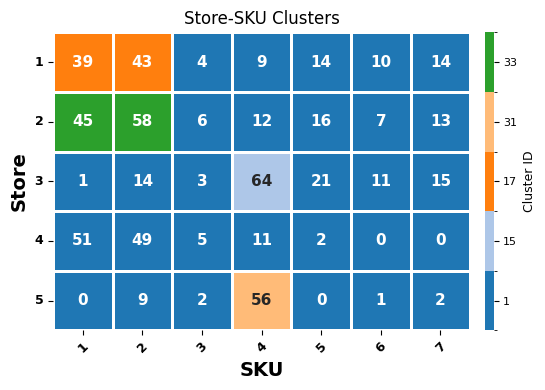

In [43]:
#row_order, col_order = est.get_row_col_orders(assign, df)
#row_order, col_order = est.get_row_col_orders(assign, norm_data2)
df2 = get_normalized_assignments(assign, df)  # contains unique per-cell block_id
#row_order, col_order = get_row_col_orders_smart(df2)
row_order = sorted(df2["store"].unique())
col_order = sorted(df2["item"].unique())

fn = Path("../output/figures/store_item_toy_data_heatmap.tiff")
plot_block_annot_heatmap(
    df2,
    ttl="Store-SKU Clusters",
    value_col="growth_rate_1", 
    block_col="block_id",
    row_col="store", 
    col_col="item",
    date_col=None,                
    row_order=row_order, 
    col_order=col_order,
    fmt= "{:.0f}",
    cell_h=0.6, 
    cell_w=0.75, 
    font_size=11,
    #figsize=(6, 4),
    x_label="SKU",
    y_label="Store",
    xlabel_size=14,
    ylabel_size=14,
    label_weight="bold",
    fn=None,
    xtick_rotation=45,
)

In [48]:
# Freeze your defaults once, then sweep:
make_btf = BinaryTriFactorizationEstimator.factory(
    k_row=None, 
    k_col=None, 
    loss="gaussian", 
    alpha=1e-2, 
    beta=0.6,
    block_l1=0.1,             # 0 = off; >0 = L1 on B (0.01 = good start)
    b_inner=15,               # inner prox steps for B when block_l1>0
    max_iter=50,
    tol=1e-5,
)
    
# Define your grid
R_list = range(1, 10)
C_list = range(1, 10)

# Run the sweep
grid_df = sweep_btf_grid(
    make_btf,
    X,
    R_list,
    C_list,
    restarts=3,
    seeds=range(123, 999),     # optional
    min_keep=6,
    fit_kwargs={"max_iter": 200, "tol": 1e-4},  # pass your estimator kwargs here
)

# Rank and pick the best (edit ranking logic inside pick_best_btf_setting if desired)
ranked_df, best = pick_best_btf_setting(grid_df)


2025-09-08 08:35:13,126 - INFO - Fitting BTF with R=1, C=1
2025-09-08 08:35:13,140 - INFO - Computing cell mask for R=1, C=1
/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/BTNMF_util.py:792: RuntimeWarning: Mean of empty slice
  float(np.nanmean(wcvdf["silhouette_like"]))
2025-09-08 08:35:13,145 - INFO - Fitting BTF with R=1, C=2
2025-09-08 08:35:13,165 - INFO - Computing cell mask for R=1, C=2
/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/BTNMF_util.py:792: RuntimeWarning: Mean of empty slice
  float(np.nanmean(wcvdf["silhouette_like"]))
2025-09-08 08:35:13,170 - INFO - Fitting BTF with R=1, C=3
2025-09-08 08:35:13,192 - INFO - Computing cell mask for R=1, C=3
2025-09-08 08:35:13,196 - INFO - Fitting BTF with R=1, C=4
2025-09-08 08:35:13,227 - INFO - Computing cell mask for R=1, C=4
2025-09-08 08:35:13,231 - INFO - Fitting BTF with R=1, C=5
2025-09-08 08:35:13,252 - INFO - Computing cell mask for R=1, C=5
2025-

In [49]:
best

n_row                                9.000000
n_col                                4.000000
Mask_Nobs                           11.000000
Mask_Coverage                        0.314286
seed                               123.000000
Loss                               193.697610
Percent_Loss                         0.825334
RMSE                                 2.352492
Percent_RMSE                         9.084789
PVE                                  0.977560
Mean Silhouette                      0.588852
BlockContribution_Total          18626.202594
BlockContribution_PerCell         1693.291145
BlockContribution_RelBaseline        5.808148
BlockContribution_FracWeak20         0.000000
BlockContribution_Gini               0.869474
B_Sparsity                           0.642857
Coverage                             1.000000
AIC                                215.928380
BIC                                230.252610
Name: 0, dtype: float64